# I] Import and options


In [12]:
import pandas, numpy, seaborn, scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# have text as text and not curve in .svg
matplotlib.rcParams['svg.fonttype'] = 'none'
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':24, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})

In [2]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] DL data

## A) Extracellular Acidification Rate 

In [5]:
data = "wb1_", "wb2_", "wb3_"
conditions = 'dmso', 'baf'
dfs_normalized = []
for condition in conditions:
    for wb in data:
        path = input_file_directory + "mefs/mefs_western_blot/"+wb+condition+".csv" #download
        df = pandas.read_csv(path, sep = ";")
        df = df.T #transpose
        df.columns = df.loc['proteins'] #select head of columns
        df.columns.name = None #remove name of index column
        df = df.drop(df.index[0:2])
        df = df.assign(flag_actin = df['flag']/ df['actin'],
                       p62_actin= df['p62']/ df['actin'],
                       lc3_actin= df['lc3']/ df['actin']) 
        df = df.iloc[:,4:] #select normalized columns
        df.reset_index(inplace = True)
        df = df[(df['index'] == 'MEF') | (df['index'] == 'EV') | 
                (df['index'] == 'WT1') | (df['index'] == 'dVSR1')] #select norm_ev_wt1_mut1
        df = df.replace({'index' : {'MEF':'MEF WT','EV':'ATG7-/-','WT1':'ATG7(1)','dVSR1':'dVSR(1)'}})
        dfs_normalized.append(df)

wbs_dmso = pandas.concat([dfs_normalized[0], dfs_normalized[1], dfs_normalized[2]], axis=0)
wbs_baf = pandas.concat([dfs_normalized[3], dfs_normalized[4], dfs_normalized[5]], axis=0)
wbs_dmso


,index,flag_actin,p62_actin,lc3_actin
0,MEF WT,0.180522,0.344499,2.01803
1,ATG7-/-,0.130909,0.576838,0.147086
2,ATG7(1),0.628593,0.332326,1.95802
3,dVSR(1),0.959698,0.721158,0.133515
0,MEF WT,0.0468461,0.419058,1.19199
1,ATG7-/-,0.0850659,1.02492,0.682458
2,ATG7(1),1.1987,0.642068,1.35348
3,dVSR(1),1.19579,0.924603,0.618526
0,MEF WT,0.16182,0.359592,1.31444
1,ATG7-/-,0.222616,0.657405,0.467422


12
12


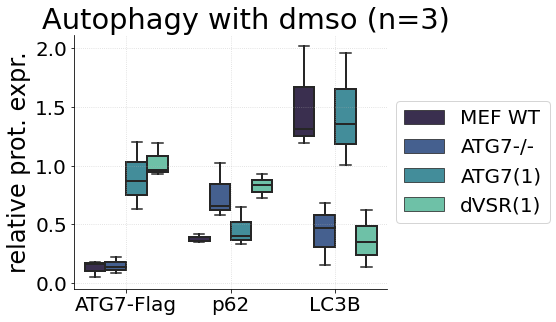

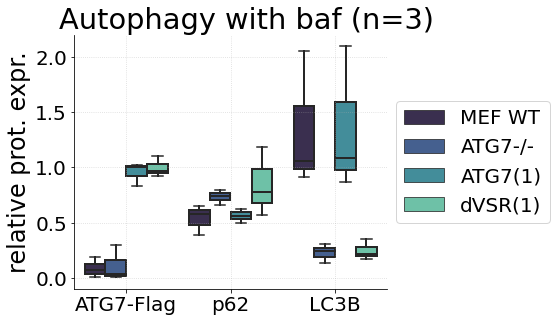

In [64]:
# Distribution: Data preparation + graph
dfs = [wbs_dmso, wbs_baf]
infos = ['dmso', 'baf']

for i in range(len(dfs)) :
    Data = dfs[i]
    Info = infos[i]
    
    Data.reset_index(inplace = True, drop = True)
    shape = Data.shape
    shape = shape[0]
    print(shape)

    #select the sample type column
    sample_type = {'sample_type':[Data.iloc[:,0][i]
      for i in range(0, shape)]}

    #convert to df, and copy it 3 times
    sample_typedf = pandas.DataFrame(sample_type)
    sample_typedf = pandas.concat([sample_typedf,sample_typedf,sample_typedf,
                                  sample_typedf,sample_typedf,sample_typedf])
    sample_typedf.reset_index(drop=True, inplace=True)

    # Y for expression value 
    y = {'y':[Data.iloc[:,j][i]
      for j in range(1,4)
        for i in range(0, shape)]}

    #create df with Y 
    data_distrib = pandas.DataFrame(y)

    # X for ATG7/iso1/iso2                              
    data_distrib.loc[:shape,'x'] = 'ATG7-Flag'
    data_distrib.loc[shape: shape*2,'x'] = 'p62'
    data_distrib.loc[shape*2:,'x'] = 'LC3B'

    # Will be used for Hue
    data_distrib['Sample Type'] = sample_typedf['sample_type']

    #graph
    seaborn.catplot(x="x", y="y", hue="Sample Type", aspect= 1.2, kind="box", palette = 'mako',
                    data = data_distrib, boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, 
                    showcaps=True, showfliers=False, legend=False)

    plt.grid(alpha = 0.5, ls=':')
    plt.ylabel('relative prot. expr.')
    plt.xlabel('')
    plt.title('Autophagy with '+ Info + ' (n=3)', x=.55)
    plt.tight_layout()
    plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(1.55, 0.5))

    # #save
    # path = 'ATG7/figs_ATG7_characterisation/'
    # plt.savefig(output_file_directory+path+'ATG7_exp_alltissue.svg')

12
12


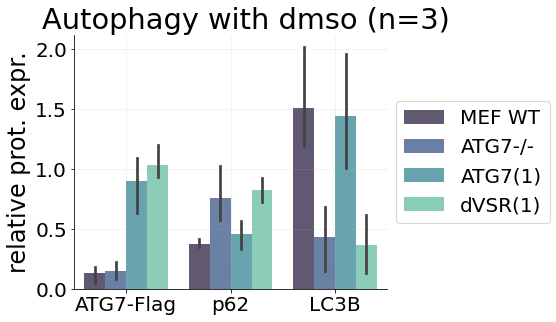

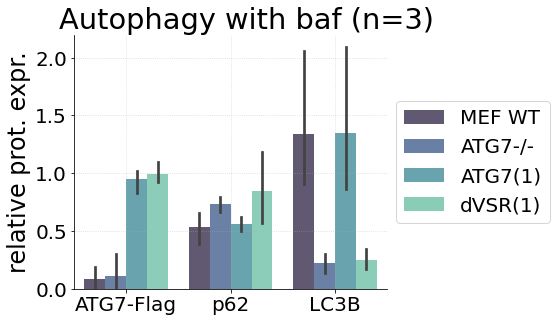

In [56]:
# Distribution: Data preparation + graph
dfs = [wbs_dmso, wbs_baf]
infos = ['dmso', 'baf']

for i in range(len(dfs)) :
    Data = dfs[i]
    Info = infos[i]
    
    Data.reset_index(inplace = True, drop = True)
    shape = Data.shape
    shape = shape[0]
    print(shape)

    #select the sample type column
    sample_type = {'sample_type':[Data.iloc[:,0][i]
      for i in range(0, shape)]}

    #convert to df, and copy it 3 times
    sample_typedf = pandas.DataFrame(sample_type)
    sample_typedf = pandas.concat([sample_typedf,sample_typedf,sample_typedf,
                                  sample_typedf,sample_typedf,sample_typedf])
    sample_typedf.reset_index(drop=True, inplace=True)

    # Y for expression value 
    y = {'y':[Data.iloc[:,j][i]
      for j in range(1,4)
        for i in range(0, shape)]}

    #create df with Y 
    data_distrib = pandas.DataFrame(y)

    # X for ATG7/iso1/iso2                              
    data_distrib.loc[:shape,'x'] = 'ATG7-Flag'
    data_distrib.loc[shape: shape*2,'x'] = 'p62'
    data_distrib.loc[shape*2:,'x'] = 'LC3B'

    # Will be used for Hue
    data_distrib['Sample Type'] = sample_typedf['sample_type']

    #graph
    seaborn.catplot(x="x", y="y", hue="Sample Type", aspect= 1.2, kind="bar",
                    palette= 'mako', alpha = 0.8, data = data_distrib, legend=False)
    plt.grid(alpha = 0.5, ls=':')
    plt.tight_layout()
    plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(1.55, 0.5))
    plt.ylabel('relative prot. expr.')
    plt.xlabel('')
    plt.title('Autophagy with '+ Info + " (n=3)", x=.55)

    # #save
    # path = 'ATG7/figs_ATG7_characterisation/'
    # plt.savefig(output_file_directory+path+'ATG7_exp_alltissue.svg')
